In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.visualization import (MinMaxInterval, 
                                   SqrtStretch, 
                                   PowerStretch,
                                   ImageNormalize)
from astropy.visualization.stretch import LogStretch, LinearStretch

In [2]:
import os.path
def masterflat(outputfilename, inputpattern, nfiles=11):
    if os.path.isfile(outputfilename):
        raise OSError("File already exists")
    filenames = (inputpattern.format(i+1) for i in range(nfiles))
    cube = (fits.getdata(x) for x in filenames)
    normalized = (x/np.mean(x) for x in cube)
    master = np.median(np.array(list(normalized)), axis=0)
    master = master / master.mean()
    fits.writeto(outputfilename, master)

for filt in ["Ha2", "Ha", "R", "G", "B"]:
    try:
        masterflat("20171005/flat_{}_master.FIT".format(filt), 
                   "20171005/flat_{}".format(filt) + "_{0:03d}.FIT")
    except OSError:
        pass

In [3]:
flat_R_master = fits.getdata("20171005/flat_R_master.FIT")
flat_G_master = fits.getdata("20171005/flat_G_master.FIT")
flat_B_master = fits.getdata("20171005/flat_B_master.FIT")
flat_Ha_master = fits.getdata("20171005/flat_Ha_master.FIT")
flat_Ha2_master = fits.getdata("20171005/flat_Ha2_master.FIT")

m51_R_480 = fits.getdata("20171005/M51_R_480.FIT")
m51_R_480 =  m51_R_480 / flat_R_master

m51_R_60 = fits.getdata("20171005/M51_R_60.FIT")
m51_R_60 =  m51_R_60 / flat_R_master

m51_G_60 = fits.getdata("20171005/M51_G_60.FIT")
m51_G_60 =  m51_G_60 / flat_G_master

m51_B_120 = fits.getdata("20171005/M51_B_120.FIT")
m51_B_120 =  m51_B_120 / flat_B_master

m51_Ha_480 = fits.getdata("20171005/M51_Ha_480.FIT")
m51_Ha_480 =  m51_Ha_480 / flat_Ha_master

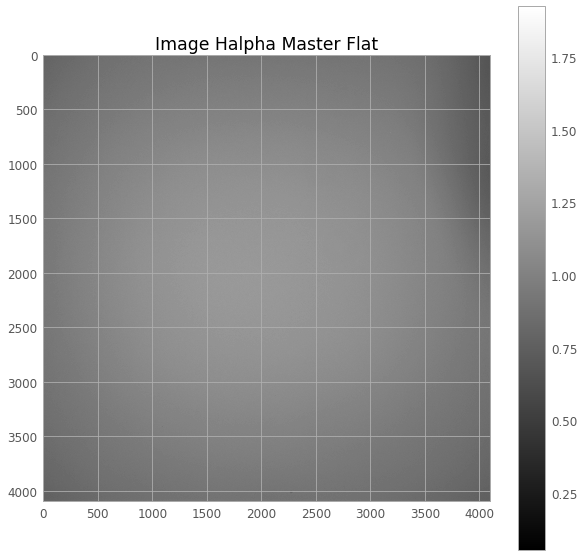

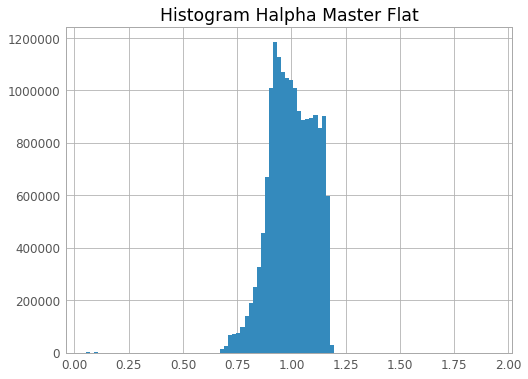

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(flat_Ha_master, cmap="gray", interpolation="none")
plt.colorbar()
plt.title("Image Halpha Master Flat")

plt.figure()
plt.hist(flat_Ha_master.flat, bins=100)
plt.title("Histogram Halpha Master Flat")

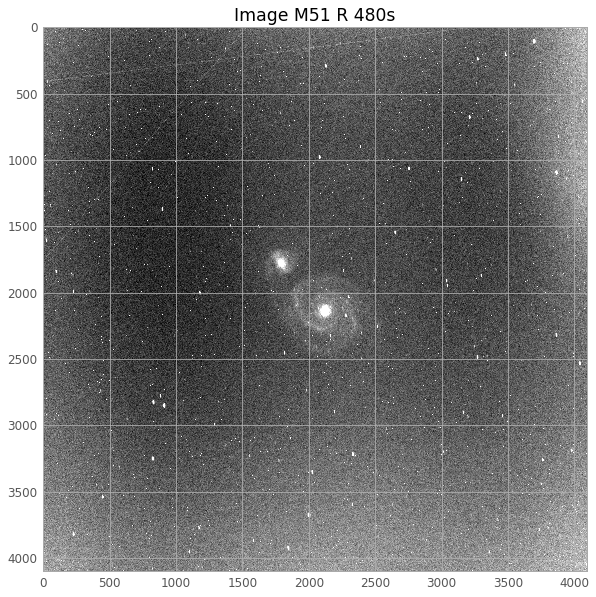

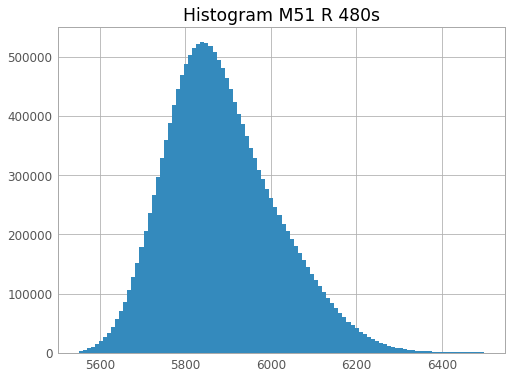

In [5]:
plt.figure(figsize = (10,10))
norm = ImageNormalize(vmin=5550, vmax=6500, stretch=LinearStretch())
plt.imshow(m51_R_480, cmap="gray", norm=norm, interpolation="none")
plt.title("Image M51 R 480s")

plt.figure()
h = plt.hist(m51_R_480.flat, bins=100, range=(5550,6500))
plt.title("Histogram M51 R 480s")

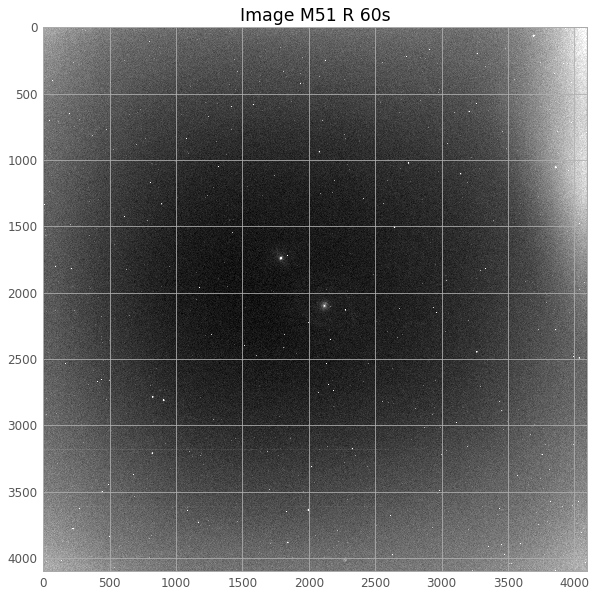

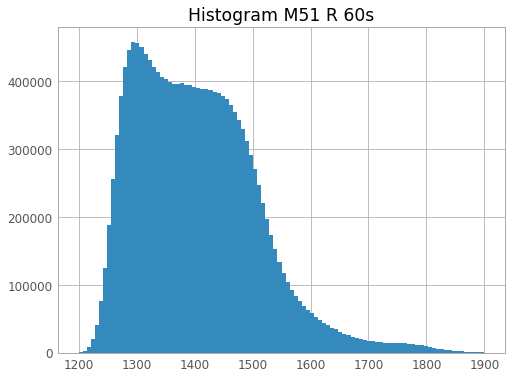

In [6]:
plt.figure(figsize = (10,10))
norm = ImageNormalize(vmin=1200, vmax=1900, stretch=LinearStretch())
plt.imshow(m51_R_60, cmap="gray", norm=norm, interpolation="none")
plt.title("Image M51 R 60s")

plt.figure()
h = plt.hist(m51_R_60.flat, bins=100, range=(1200,1900))
plt.title("Histogram M51 R 60s")

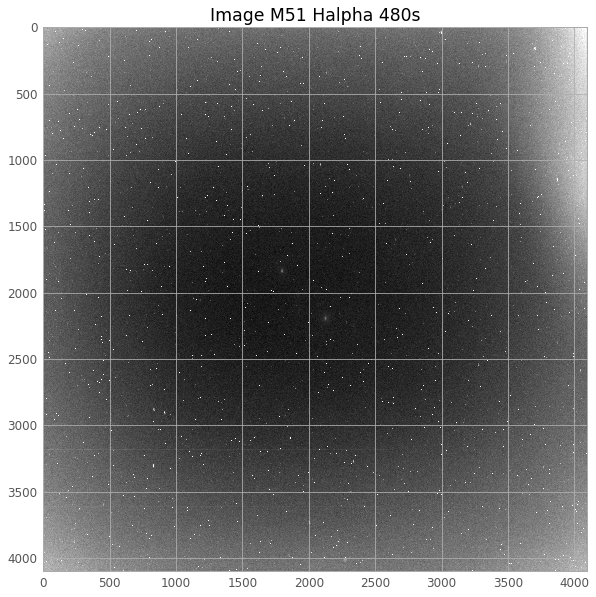

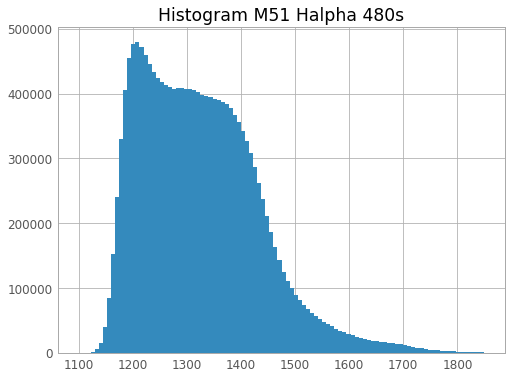

In [7]:
plt.figure(figsize = (10,10))
norm = ImageNormalize(vmin=1100, vmax=1850, stretch=LinearStretch())
plt.imshow(m51_Ha_480, cmap="gray", norm=norm, interpolation="none")
plt.title("Image M51 Halpha 480s")

plt.figure()
h = plt.hist(m51_Ha_480.flat, bins=100, range=(1100,1850))
plt.title("Histogram M51 Halpha 480s")

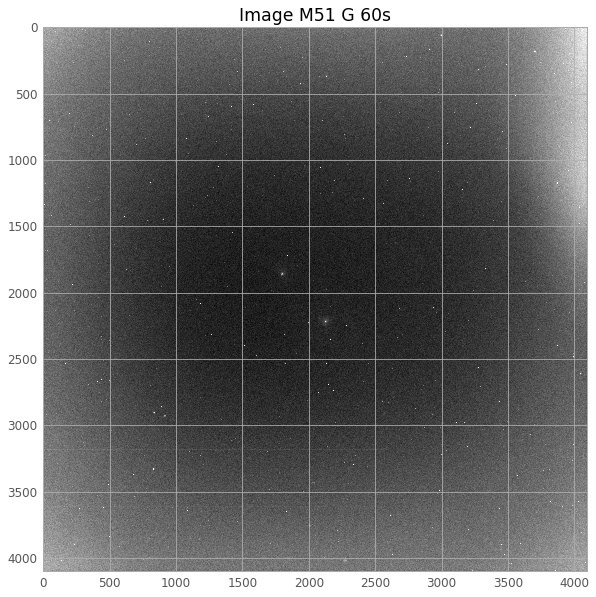

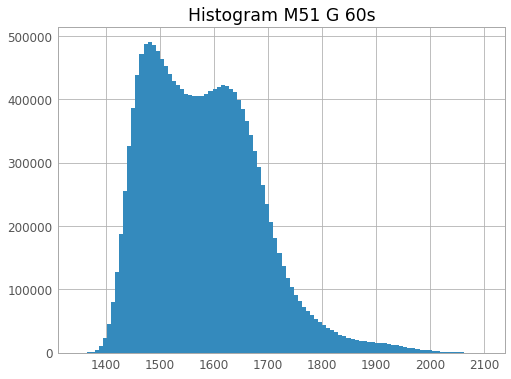

In [8]:
plt.figure(figsize = (10,10))
norm = ImageNormalize(vmin=1350, vmax=2100, stretch=LinearStretch())
plt.imshow(m51_G_60, cmap="gray", norm=norm, interpolation="none")
plt.title("Image M51 G 60s")

plt.figure()
h = plt.hist(m51_G_60.flat, bins=100, range=(1350,2100))
plt.title("Histogram M51 G 60s")

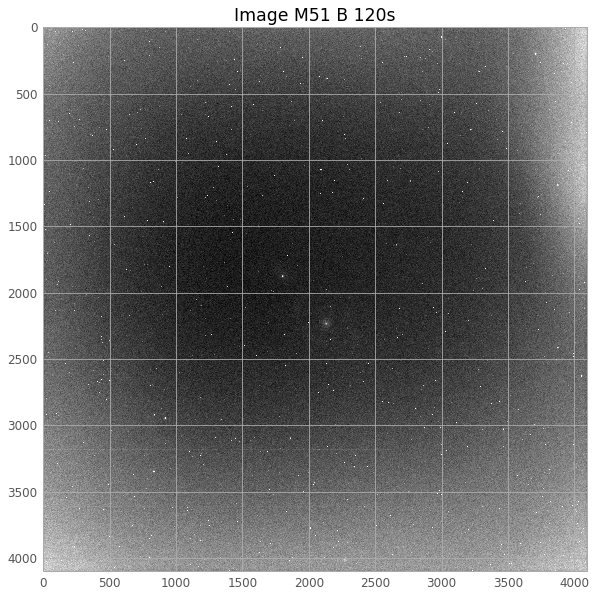

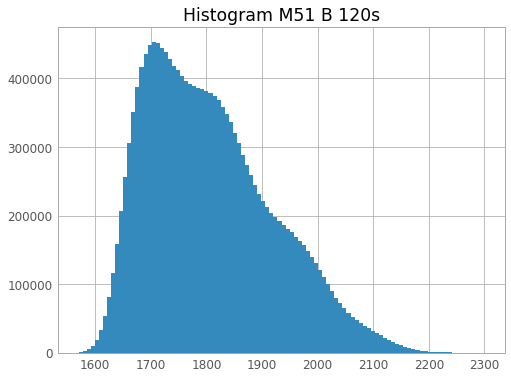

In [9]:
plt.figure(figsize = (10,10))
norm = ImageNormalize(vmin=1570, vmax=2300, stretch=LinearStretch())
plt.imshow(m51_B_120, cmap="gray", norm=norm, interpolation="none")
plt.title("Image M51 B 120s")

plt.figure()
h = plt.hist(m51_B_120.flat, bins=100, range=(1570,2300))
plt.title("Histogram M51 B 120s")

In [10]:
#from glob import glob
#dark_subtracted = dict([(x, "Auto Dark Subtraction" in fits.getheader(x).values()) for x in glob("20171005/*.FIT")])
#sorted(dark_subtracted.items())